#Jirat Hemmara

###Objective
Created a model of House_Price_Dataset data using linear regression to predict house prices using the data set's various factors.

to studied in this project: I created linear regression model in 3 different method.
1. 1st model: Used all variable column to created model and find inside values in statistic.
2. 2nd model: Used variable column which correlation value between target variable column more than 0.5 to create model and find inside values in statistic.
3. Normalize model: normalized all variable column to created model and compare statistic value between 1st model.

###Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Dataset from Kaggle: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data
df = pd.read_csv('housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
column_names = df.columns.tolist()
print(column_names)

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']


###Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
#check missing values data
print(df.isnull().sum())
print(df.duplicated().sum())

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64
0


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

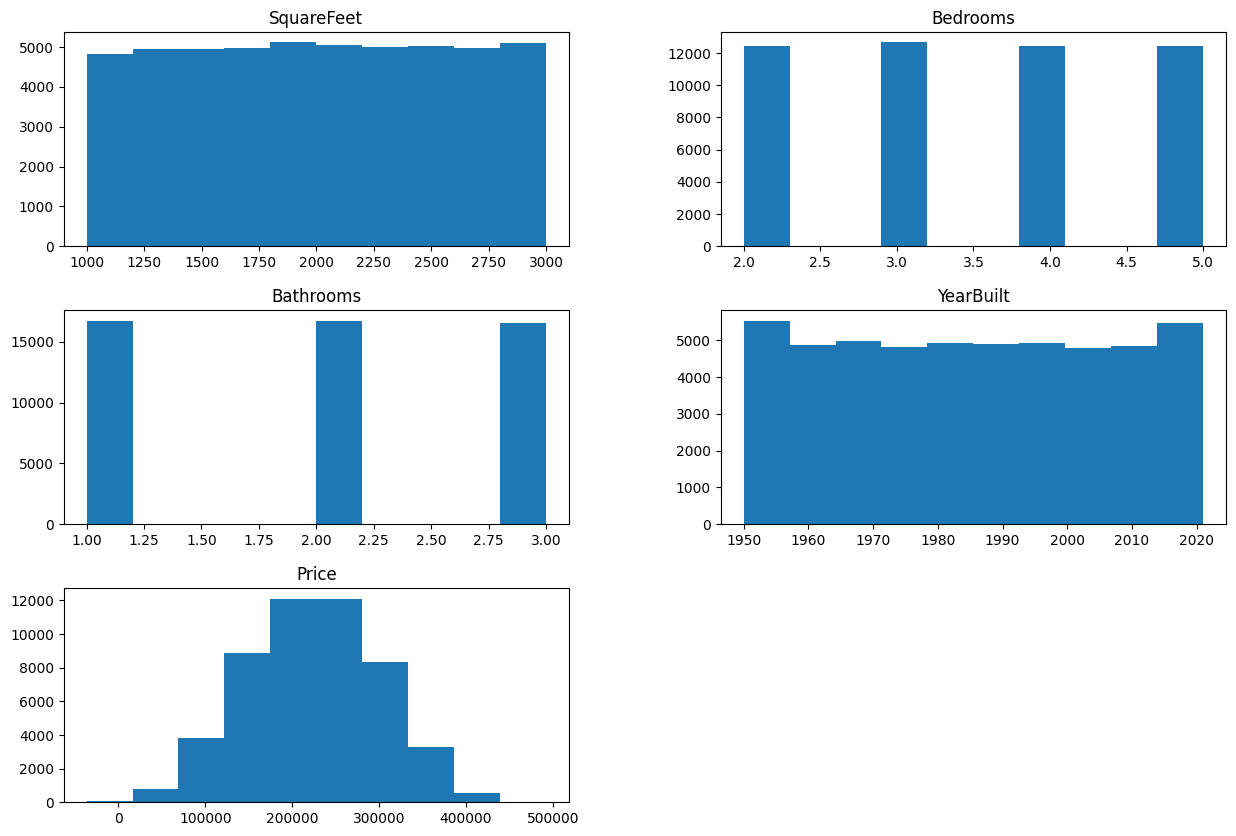

In [ ]:
# histograms
df.hist(bins=10,figsize=(15,10),grid=False)

In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


I found that Price column has a wide range of values ,and the distribution of data values is in the form of a normal distribution, so I think it appropriate to chosen as the target in the linear regression model.

<ipython-input-8-6d965c8d9efb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


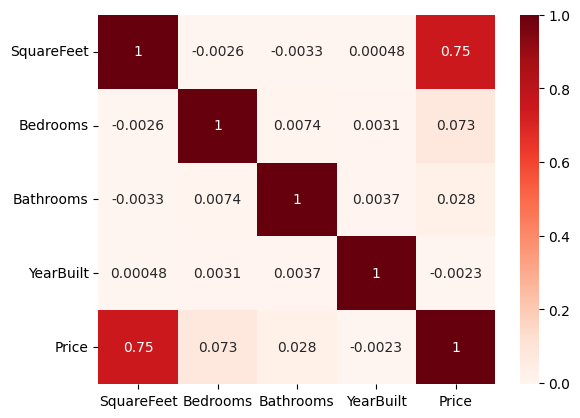

In [ ]:
#see correlation between target column('Price') and others
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

then can see the SquareFeet column has the most correlation values that is 0.75

<Axes: xlabel='SquareFeet', ylabel='Price'>

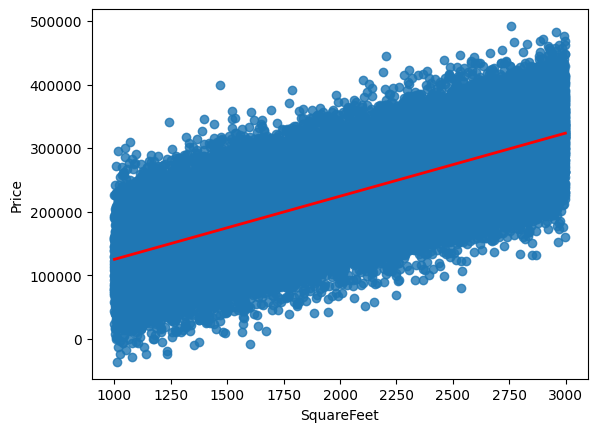

In [ ]:
x = df['SquareFeet']
y = df['Price']
sns.regplot(x=x, y=y, line_kws={'color': 'red', 'linewidth': 2})

It found that when the SquareFeet value increases, the price value will also increase.

Text(0.5, 1.0, 'Column: Price')

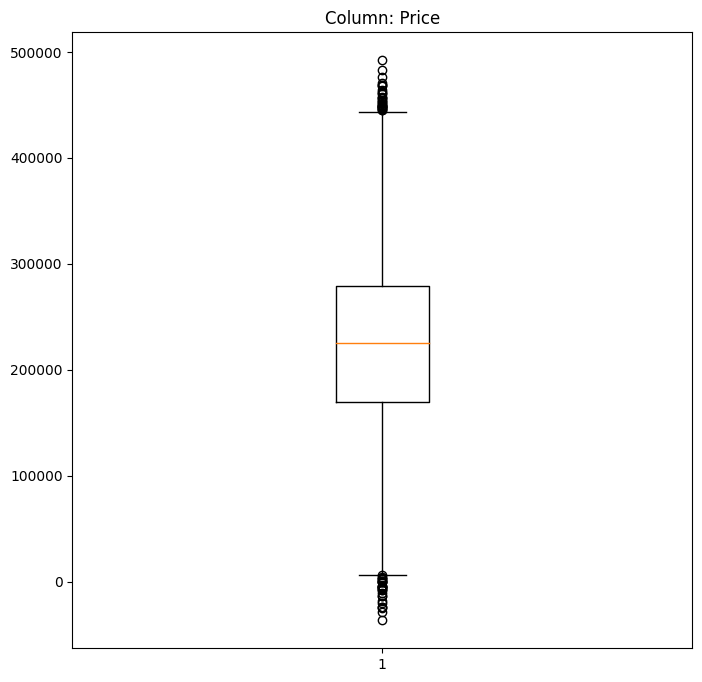

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(df.Price)
plt.title('Column: Price')

From plot: I saw the negative price data values that not useful for creating model.

In [ ]:
df['Neighborhood'].value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

###Data processing.

In [ ]:
#get dummy variable in  classification data column
Neighborhood = pd.get_dummies(df['Neighborhood'])
df = pd.concat([df, Neighborhood],axis=1)
df.drop(['Neighborhood'],axis=1,inplace=True)
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


In [ ]:
#remove negative price row
df.drop(df[df.Price < 0].index, axis=0, inplace=True)

### 1st Model

Used all variable columns to create Linear Regression Model.

In [ ]:
#import library
import time
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# variable selection
x = df[['SquareFeet','Bedrooms', 'YearBuilt','Bathrooms','Rural','Suburb','Urban']]
y = df["Price"]
print(x.shape)
print(y.shape)

(49978, 7)
(49978,)


In [ ]:
#testing data size is of 30% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
#Linear regression model
#measure run time model

start_time = time.time()
lm = LinearRegression()
model = lm.fit(x_train,y_train)
end_time = time.time()
run_time_1st_model = end_time - start_time
print(f"run_time_1st_model: {run_time_1st_model} seconds")

run_time_1st_model: 0.06920123100280762 seconds


In [ ]:
#Find the equation
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['SquareFeet', 'Bedrooms', 'YearBuilt', 'Bathrooms', 'Rural', 'Suburb',
       'Urban'],
      dtype='object')
37378.946454855846
[   99.36000078  4960.68032159   -17.20221503  2397.68762799
  -439.89276929 -1012.10362851  1451.99639779]


In [ ]:
#compare the data between Actual & Predict
y_pred = model.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
26563,206078.890039,178683.266978
40280,205679.342808,239254.417578
19125,107720.481981,187516.533708
21352,267436.946617,301772.828031
10448,275940.275519,288872.211105


Text(0.5, 1.0, 'Test & Predicted')

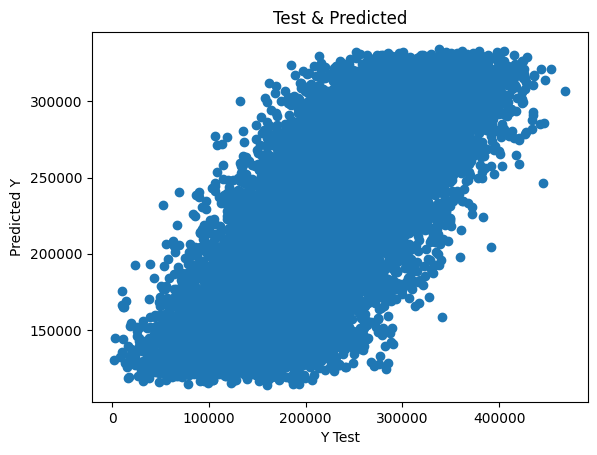

In [ ]:
#plot data point from 1st model
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test & Predicted')

In [ ]:
# calculate MSE & mean
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print('Root Mean Square Error :', math.sqrt(mse))
print('Test mean :', y_test.mean())

# R^2
print('R square :', model.score(x_test,y_test))

Root Mean Square Error : 49835.87033628695
Test mean : 225243.47162831647
R square : 0.5685883434644716


###2nd model

I used the variable value that has correlation value between 'Price' more than 0.5.

So, I choose only 'SquareFeet' variable values to created the 2nd model.

In [ ]:
#define variable
x2 = df['SquareFeet']
y2 = df['Price']

In [ ]:
#testing data size is of 30% of entire data
x2_train, x2_test, y2_train, y2_test =train_test_split(x2,y2, test_size=0.3, random_state=101)

In [ ]:
#reshape for created model
import numpy as np
def reshape(col):
  reshape_col = np.array(col).reshape(-1,1)
  return reshape_col

x2_train_reshaped = reshape(x2_train)
x2_test_reshaped = reshape(x2_test)
y2_train_reshaped = reshape(y2_train)
y2_test_reshaped = reshape(y2_test)

In [ ]:
#Linear regression model
#measure run time model

start_time = time.time()
lm = LinearRegression()
model = lm.fit(x2_train_reshaped,y2_train_reshaped)
end_time = time.time()
run_time_2st_model = end_time - start_time
print(f"run_time_1st_model: {run_time_2st_model} seconds")

run_time_1st_model: 0.012975931167602539 seconds


In [ ]:
y2_pred= model.predict(x2_test_reshaped)

Text(0.5, 1.0, 'Test & Predicted')

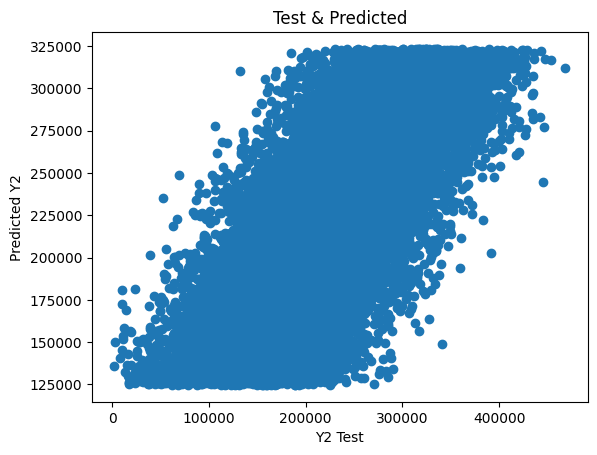

In [ ]:
#plot data point from 2nd model
plt.scatter(y2_test_reshaped,y2_pred)
plt.xlabel('Y2 Test')
plt.ylabel('Predicted Y2')
plt.title('Test & Predicted')

In [ ]:
# calculate MSE & mean
mse = sklearn.metrics.mean_squared_error(y2_test_reshaped, y2_pred)
print('Root Mean Square Error :', math.sqrt(mse))
print('Test mean :', y2_test_reshaped.mean())

# R^2
print('R square :', model.score(x2_test_reshaped,y2_test_reshaped))

Root Mean Square Error : 50280.80241629275
Test mean : 225243.47162831647
R square : 0.5608507143529209


###Normalize Data to created model

normalized all variable column to created model and compare statistic value between 1st model.

Why I chose compare with 1st model?

Because the 1st model has higher R square than the 2nd model.

In [ ]:
#define mormalize function
def normalize_data(data,name):
  for k in name:
    data[name] = (data[name]/ data[name].max())
  return data

In [ ]:
#normalize
name = df.columns.tolist()
name.remove("YearBuilt")
df_nml = normalize_data(df, name)
df_nml

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban
0,0.708903,0.8,0.333333,1969,0.437540,1.0,0.0,0.0
1,0.819940,0.6,0.666667,1980,0.396213,1.0,0.0,0.0
2,0.620207,0.4,0.333333,1970,0.623515,0.0,1.0,0.0
3,0.764922,0.4,0.333333,1996,0.420132,0.0,0.0,1.0
4,0.710237,1.0,0.666667,2001,0.553513,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
49995,0.427476,1.0,1.000000,1975,0.203336,1.0,0.0,0.0
49996,0.951651,0.4,0.666667,1988,0.760892,0.0,1.0,0.0
49997,0.993331,1.0,1.000000,1962,0.780403,0.0,1.0,0.0
49998,0.865622,1.0,0.666667,1984,0.773093,1.0,0.0,0.0


In [ ]:
#Used same method of 1st model
x = df_nml[['SquareFeet','Bedrooms', 'YearBuilt','Bathrooms','Rural','Suburb','Urban']]
y = df_nml["Price"]
x_nml_train, x_nml_test, y_nml_train, y_nml_test =train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
#Linear regression model
#measure run time model

start_time = time.time()
lm = LinearRegression()
model = lm.fit(x_nml_train,y_nml_train)
end_time = time.time()
run_time_nml_model = end_time - start_time
print(f"run_time_nml_model: {run_time_nml_model} seconds")

run_time_nml_model: 0.027862071990966797 seconds


In [ ]:
y_nml_pred= model.predict(x_nml_test)

Text(0.5, 1.0, 'Normalize Test & Predicted')

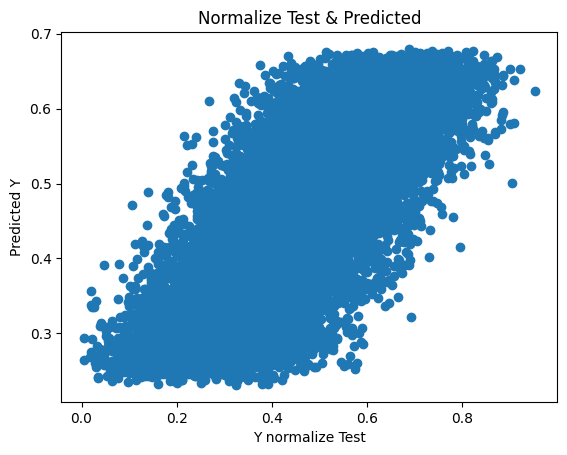

In [ ]:
#plot data point from normalized model

plt.scatter(y_nml_test,y_nml_pred)
plt.xlabel('Y normalize Test')
plt.ylabel('Predicted Y')
plt.title('Normalize Test & Predicted')

From graph, can see the distribution of normalize model graph is same the 1st model

In [ ]:
# After normalize find R square value.

# R^2
print('R square :', model.score(x_nml_test,y_nml_test))

R square : 0.5685883434644716


###*Conclusion*
#1st model
From Linear regression 1st model, I can get some values from model.
let X1 ='SquareFeet', X2 ='Bedrooms', X3 ='YearBuilt' ,X4='Bathrooms' , X5= 'Rural', X6 = 'Suburb', X7 = 'Urban' then I can get linear equation.

equation: y = 99.36000078*(X1)+4960.68032159*(X2)-17.20221503*(X3)+2397.68762799*(X4)-439.89276929*(X5)-1012.10362851*(X6)+1451.99639779*(X7)+37378.946454855846

Root Mean Square Error : 49835.87033628695

Test mean : 225243.47162831647

R square : 0.5685883434644716
#2nd model
In the 2nd model, can get statistic values:

Root Mean Square Error : 50280.80241629275

Test mean : 225243.47162831647

R square : 0.5608507143529209

--Can see the 2nd model has RMSE and R square values more than the 1st model. It mean the 1st model is better model than the 2nd model.--

Question: Why R square in the 2nd model is lower than the 1st model, although the 2nd model select better variable values to create model.

Ans: R square is a measure that provides information about the goodness of fit of a model. So, I think many variable data columns can explain or provide information of model better than model that created from less variable data columns.

#Normalize model
I decide to normalize all variable because the 1st model has RMSE and R square values better. After I normalized the all variable in order to see R square values.

R square : 0.5685883434644716

It mean the 1st model and normalize model has same R square.

Question: Why?

Ans: From histrogarms of this dataset, it have distribution of the data in similar scale. I think normalized the data does not improve R square better because of distribution data that in similar scale.

But If take a look at run time of creating model, I see different run time coding between 2 model.

run_time_1st_model: 0.06920123100280762 seconds

run_time_nml_model: 0.027862071990966797 seconds

that I can see run time of normalize model is less than the 1st model because normalized data is reducing the range of the data, for creating model, the widely of the range data, time to creating model will be increase too.



